## Import Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import binom_test

import statsmodels.api as sm
from statsmodels.formula.api import logit

pd.set_option('display.max_rows',500)

In [2]:
df = pd.read_csv("fut_packlog.csv")
df.head(15)

Event   Date          Pack Type trsh/door/brd/WO  Top Rating
0     1.0  10/29  Premium Gold Pack             Door        80.0
1     NaN    NaN                NaN             Door         NaN
2     NaN    NaN                NaN             Door         NaN
3     NaN    NaN                NaN             Door         NaN
4     NaN    NaN                NaN             Door         NaN
5     NaN    NaN                NaN             Door         NaN
6     NaN    NaN                NaN             Door         NaN
7     NaN    NaN                NaN             Door         NaN
8     NaN    NaN                NaN             Door         NaN
9     NaN    NaN                NaN             Door         NaN
10    NaN    NaN                NaN             Door         NaN
11    NaN    NaN                NaN             Door         NaN
12    NaN    NaN                NaN             Door         NaN
13    1.0  10/29  Premium Gold Pack             Door        80.0
14    NaN    NaN                NaN             Door         NaN

In [3]:
df.columns

Index(['Event', 'Date', 'Pack Type', 'trsh/door/brd/WO', 'Top Rating'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17842 entries, 0 to 17841
Data columns (total 5 columns):
Event               2012 non-null float64
Date                2012 non-null object
Pack Type           2012 non-null object
trsh/door/brd/WO    17842 non-null object
Top Rating          2009 non-null float64
dtypes: float64(2), object(3)
memory usage: 697.1+ KB


## Clean Data - 'Event'

In [5]:
df['Event'].unique()

# Double check that 'Event' column is only numerical values 1-110 (AKA the # of events in data, which is 140)

array([  1.,  nan,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140.])

In [6]:
df['trsh/door/brd/WO'].unique()

# Check if 'trsh/door/brd/WO' column has any typos. Should only be 4 values.
# This column should display "trash, door, board, WO". If values don't match up, change via Find and Replace
# Change after dropping blank rows

array(['Door', 'Board', 'WO'], dtype=object)

## Clean Data - Drop Blank Rows

In [7]:
df.dropna()

Event   Date          Pack Type trsh/door/brd/WO  Top Rating
0        1.0  10/29  Premium Gold Pack             Door        80.0
13       1.0  10/29  Premium Gold Pack             Door        80.0
26       1.0  10/29  Premium Gold Pack             Door        79.0
39       1.0  10/29  Premium Gold Pack             Door        78.0
52       1.0  10/29  Premium Gold Pack             Door        78.0
...      ...    ...                ...              ...         ...
17837  140.0  10/17  premium gold pack             Door        79.0
17838  140.0  10/17  premium gold pack             Door        80.0
17839  140.0  10/17  premium gold pack             Door        77.0
17840  140.0  10/17  premium gold pack             Door        78.0
17841  140.0  10/17  premium gold pack             Door        75.0

[2005 rows x 5 columns]

In [8]:
# newdf with blank rows dropped
data = df.dropna()

In [9]:
data.reset_index(drop=True, inplace=True)

## Clean Data - 'trsh/door/brd/WO'

In [10]:
data['trsh/door/brd/WO'].unique()

array(['Door', 'Board', 'WO'], dtype=object)

In [11]:
# Change to "trash, door, board, WO" by find and replace.

data.replace('doors','door',inplace = True)
data.replace('Door','door',inplace = True)
data.replace('Board','board',inplace = True)
data.replace('boards','board',inplace = True)
data.replace('boad','board',inplace = True)
data.replace('walkout','WO',inplace = True)
data.replace('Walkout','WO',inplace = True)
data.head(30)

/Users/bryanjamieson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Event   Date                  Pack Type trsh/door/brd/WO  Top Rating
0     1.0  10/29          Premium Gold Pack             door        80.0
1     1.0  10/29          Premium Gold Pack             door        80.0
2     1.0  10/29          Premium Gold Pack             door        79.0
3     1.0  10/29          Premium Gold Pack             door        78.0
4     1.0  10/29          Premium Gold Pack             door        78.0
5     1.0  10/29          Premium Gold Pack             door        81.0
6     1.0  10/29          Premium Gold Pack             door        79.0
7     1.0  10/29          Premium Gold Pack             door        79.0
8     1.0  10/29          Premium Gold Pack             door        80.0
9     1.0  10/29          Premium Gold Pack             door        81.0
10    1.0  10/29          Premium Gold Pack             door        77.0
11    1.0  10/29          Premium Gold Pack             door        80.0
12    1.0  10/29          Premium Gold Pack             door        78.0
13    1.0  10/29          Premium Gold Pack             door        79.0
14    1.0  10/29          Premium Gold Pack             door        82.0
15    1.0  10/29          Premium Gold Pack             door        79.0
16    1.0  10/29          Premium Gold Pack             door        78.0
17    1.0  10/29          Premium Gold Pack             door        81.0
18    1.0  10/29          Premium Gold Pack            board        84.0
19    1.0  10/29          Premium Gold Pack             door        79.0
20    1.0  10/29          Premium Gold Pack             door        78.0
21    1.0  10/29          Premium Gold Pack             door        78.0
22    1.0  10/29          Premium Gold Pack             door        83.0
23    1.0  10/29          Premium Gold Pack             door        78.0
24    1.0  10/29          Premium Gold Pack             door        82.0
25    2.0  10/30            Jumbo Gold Pack             door        77.0
26    2.0  10/30    Jumbo Premium Gold Pack             door        81.0
27    2.0  10/30  Premium Gold Players Pack            board        84.0
28    2.0  10/30  Premium Gold Players Pack             door        82.0
29    2.0  10/30  Premium Gold Players Pack             door        82.0

## Clean Data - 'Pack Types'

In [12]:
data['Pack Type'].unique()

array(['Premium Gold Pack', 'Jumbo Gold Pack', 'Jumbo Premium Gold Pack',
       'Premium Gold Players Pack', 'Mega Pack', 'Electrum Players Pack',
       'Premium Electrum Players Pack', 'Prime Electrum Players Pack',
       'Rare Electrum Players Pack', 'Rare Mixed Players Pack Pack',
       'Rare Mixed Players Pack', 'gold pack', 'small gold players pack',
       'mixed players pack', 'rare gold pack',
       'Jumbo premoium gold players', 'Rare mixed players pack',
       'Prime Gold Players Pack', 'Prime Mixed Players Pack',
       'Small Rare Gold Players Pack', 'Two Players Pack',
       'Small Electrum Players Pack', 'Small Prime Mixed Players Pack',
       'Small Rare Mixed Players Pack', 'Two player pack',
       'Rare Gold Pack', 'Small Gold Players Pack',
       'Small Prime Gold Players Pack', 'Prime Silver Players Pack',
       'Mixed Players Pack', 'Premium Mixed Players Pack',
       'Two Rare Gold Players Pack', 'Jumbo Premium Gold Players',
       'Rare Players Pack',

In [13]:
# We see duplicate pack types from: misspellings, upper/lower case issues, spacing issues
# So we change the duplicates/problem packs to one common name for each different pack types

In [14]:
data.replace('Small Prime Electrum Players Pack','small prime electrum players pack',inplace=True)
data.replace('Small Prime Electurm Players Pack','small prime electrum players pack',inplace=True)
data.replace('Jumbo Premium Gold Players Pack','jumbo premium gold players pack',inplace=True)
data.replace('Small Prime Mixed Players Pack','small prime mixed players pack',inplace=True)
data.replace('Small Prime Gold Players pack','small prime gold players pack',inplace=True)
data.replace('Jumbo Premium Gold Players','jumbo premium gold players pack',inplace=True)
data.replace('Jumbo premoium gold players','jumbo premium gold players pack',inplace=True)
data.replace('Jumbo Rare Gold Players Pack','jumbo rare gold players pack',inplace=True)
data.replace('Small Prime Gold Player Pack','small prime gold players pack',inplace=True)
data.replace('Small Prime Gold Player Pack','small prime gold players pack',inplace=True)
data.replace('Small Rare Gold Players Pack','small rare gold players pack',inplace=True)
data.replace('Small Rare gold players pack','small rare gold players pack',inplace=True)
data.replace('Small Rare Mixed Players Pack','small rare mixed players pack',inplace=True)
data.replace('Small Rare mixed Players Pack','small rare mixed players pack',inplace=True)
data.replace('Premium Electrum Players Pack','premium electrum players pack',inplace=True)
data.replace('Gold Premium Players Pack','premium gold players pack',inplace=True)
data.replace('Jumbo Premium Gold 26 Pack','jumbo premium gold 26 pack',inplace=True)
data.replace('Jumbo Premium Gold Pack','jumbo premium gold pack',inplace=True)
data.replace('Jumbo Rare Player Pack','jumbo rare players pack',inplace=True)
data.replace('Jumbo Rare Players Pack','jumbo rare players pack',inplace=True)
data.replace('One Rare Player Pack','one rare player pack',inplace=True)
data.replace('PL Premium Players Pack','pl premium players pack',inplace=True)
data.replace('Premium Gold Jumbo Pack','jumbo premium gold pack',inplace=True)
data.replace('Premium Gold Players Pack','premium gold players pack',inplace=True)
data.replace('Premium Jumbo Gold 26 Pack','jumbo premium gold 26 pack',inplace=True)
data.replace('Premium Jumbo Gold Pack','jumbo premium gold pack',inplace=True)
data.replace('Premium Mixed Players Pack','premium mixed players pack',inplace=True)
data.replace('Prime Electrum Players Pack','prime electrum players pack',inplace=True)
data.replace('Prime electrum players pack','prime electrum players pack',inplace=True)
data.replace('Prime Gold Players Pack','prime gold players pack',inplace=True)
data.replace('Prime Mixed Players Pack','prime mixed players pack',inplace=True)
data.replace('Prime Silver Players Pack','prime silver players pack',inplace=True)
data.replace('Rare Electrum Players Pack','rare electrum players pack',inplace=True)
data.replace('Rare Mixed Players Pack','rare mixed players pack',inplace=True)
data.replace('Rare mixed players pack','rare mixed players pack',inplace=True)
data.replace('Rare Mixed Players Pack Pack','rare mixed players pack',inplace=True)
data.replace('Small Gold Players Pack','small gold players pack',inplace=True)
data.replace('Small Gold Players pack','small gold players pack',inplace=True)
data.replace('Two Rare Gold Player Pack','two rare gold players pack',inplace=True)
data.replace('Two Rare Gold Players Pack','two rare gold players pack',inplace=True)
data.replace('Two UCL Common Player Pack','two ucl common players pack',inplace=True)
data.replace('UCL Rare Player Pack','ucl rare player pack',inplace=True)
data.replace('UCL Three Player Pack','ucl three player pack',inplace=True)
data.replace('Electrum Players Pack','electrum players pack',inplace=True)
data.replace('Mixed Players Pack','mixed players pack',inplace=True)
data.replace('Rare Players Pack','rare players pack',inplace=True)
data.replace('Jumbo Gold Pack','jumbo gold pack',inplace=True)
data.replace('Rare Gold Pack','rare gold pack',inplace=True)
data.replace('Rare Mega Pack','rare mega pack',inplace=True)
data.replace('Rare Mega Pack ','rare mega pack',inplace=True)
data.replace('Ultimate Pack','ultimate pack',inplace=True)
data.replace('Two player pack','two players pack',inplace=True)
data.replace('Two Player Pack','two players pack',inplace=True)
data.replace('Two Players Pack','two players pack',inplace=True)
data.replace('Gold 13 Pack','gold 13 pack',inplace=True)
data.replace('Gold 26 Pack','gold 26 pack',inplace=True)
data.replace('Gold Players Pack','gold players pack',inplace=True)
data.replace('Premium Gold Pack','premium gold pack',inplace=True)
data.replace('Mega Pack','mega pack',inplace=True)
data.replace('Gold Pack','gold pack',inplace=True)

data.head(300)

/Users/bryanjamieson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Event   Date                          Pack Type trsh/door/brd/WO  \
0      1.0  10/29                  premium gold pack             door   
1      1.0  10/29                  premium gold pack             door   
2      1.0  10/29                  premium gold pack             door   
3      1.0  10/29                  premium gold pack             door   
4      1.0  10/29                  premium gold pack             door   
5      1.0  10/29                  premium gold pack             door   
6      1.0  10/29                  premium gold pack             door   
7      1.0  10/29                  premium gold pack             door   
8      1.0  10/29                  premium gold pack             door   
9      1.0  10/29                  premium gold pack             door   
10     1.0  10/29                  premium gold pack             door   
11     1.0  10/29                  premium gold pack             door   
12     1.0  10/29                  premium gold pack             door   
13     1.0  10/29                  premium gold pack             door   
14     1.0  10/29                  premium gold pack             door   
15     1.0  10/29                  premium gold pack             door   
16     1.0  10/29                  premium gold pack             door   
17     1.0  10/29                  premium gold pack             door   
18     1.0  10/29                  premium gold pack            board   
19     1.0  10/29                  premium gold pack             door   
20     1.0  10/29                  premium gold pack             door   
21     1.0  10/29                  premium gold pack             door   
22     1.0  10/29                  premium gold pack             door   
23     1.0  10/29                  premium gold pack             door   
24     1.0  10/29                  premium gold pack             door   
25     2.0  10/30                    jumbo gold pack             door   
26     2.0  10/30            jumbo premium gold pack             door   
27     2.0  10/30          premium gold players pack            board   
28     2.0  10/30          premium gold players pack             door   
29     2.0  10/30          premium gold players pack             door   
30     2.0  10/30          premium gold players pack             door   
31     2.0  10/30          premium gold players pack             door   
32     2.0  10/30                          mega pack            board   
33     2.0  10/30              electrum players pack             door   
34     2.0  10/30      premium electrum players pack             door   
35     2.0  10/30        prime electrum players pack            board   
36     2.0  10/30         rare electrum players pack            board   
37     2.0  10/30         rare electrum players pack             door   
38     2.0  10/30            rare mixed players pack             door   
39     2.0  10/30            rare mixed players pack             door   
40     2.0  10/30            rare mixed players pack             door   
41     2.0  10/30            rare mixed players pack             door   
42     3.0  10/30          premium gold players pack             door   
43     3.0  10/30          premium gold players pack             door   
44     3.0  10/30          premium gold players pack             door   
45     3.0  10/30          premium gold players pack             door   
46     3.0  10/30          premium gold players pack             door   
47     3.0  10/30          premium gold players pack             door   
48     3.0  10/30          premium gold players pack            board   
49     3.0  10/30          premium gold players pack             door   
50     3.0  10/30          premium gold players pack            board   
51     3.0  10/30          premium gold players pack             door   
52     4.0  10/30                          gold pack             door   
53     4.0  10/30            small gold players pack           

In [15]:
data['Pack Type'].unique()

array(['premium gold pack', 'jumbo gold pack', 'jumbo premium gold pack',
       'premium gold players pack', 'mega pack', 'electrum players pack',
       'premium electrum players pack', 'prime electrum players pack',
       'rare electrum players pack', 'rare mixed players pack',
       'gold pack', 'small gold players pack', 'mixed players pack',
       'rare gold pack', 'jumbo premium gold players pack',
       'prime gold players pack', 'prime mixed players pack',
       'small rare gold players pack', 'two players pack',
       'Small Electrum Players Pack', 'small prime mixed players pack',
       'small rare mixed players pack', 'Small Prime Gold Players Pack',
       'prime silver players pack', 'premium mixed players pack',
       'two rare gold players pack', 'rare players pack',
       'ucl three player pack', 'small prime electrum players pack',
       'jumbo premium gold 26 pack', 'rare mega pack',
       'jumbo rare players pack', 'two ucl common players pack',
       'g

In [16]:
# data.drop(columns=['Event','Date'],inplace=True)

# Drop columns, left code for find and replace as reference for later anaylsis. 

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 5 columns):
Event               2005 non-null float64
Date                2005 non-null object
Pack Type           2005 non-null object
trsh/door/brd/WO    2005 non-null object
Top Rating          2005 non-null float64
dtypes: float64(2), object(3)
memory usage: 78.4+ KB


In [18]:
# For everything

# https://onezero.blog/modelling-binary-logistic-regression-using-python-research-oriented-modelling-and-interpretation/

In [19]:
data["trsh/door/brd/WO"] = data["trsh/door/brd/WO"].map({"door":0, "board":1, "WO":2})

/Users/bryanjamieson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
data.head()

Event   Date          Pack Type  trsh/door/brd/WO  Top Rating
0    1.0  10/29  premium gold pack                 0        80.0
1    1.0  10/29  premium gold pack                 0        80.0
2    1.0  10/29  premium gold pack                 0        79.0
3    1.0  10/29  premium gold pack                 0        78.0
4    1.0  10/29  premium gold pack                 0        78.0

/Users/bryanjamieson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/bryanjamieson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/bryanjamieson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/bryanjamieson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/bryanjamieson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning: divi

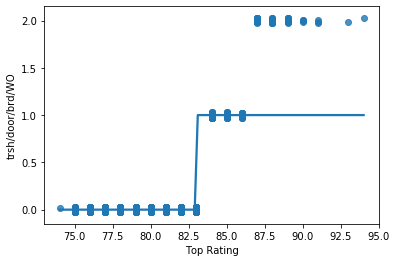

In [21]:
# Plot Top Rating (x) and trsh/door/brd/WO (y)

sns.regplot(x = "Top Rating", y = "trsh/door/brd/WO",
           y_jitter = 0.03,
           data = data,
           logistic = True,
           ci = None)
# Display the plot
plt.show()

In [22]:
data.describe()

Event  trsh/door/brd/WO   Top Rating
count  2005.000000       2005.000000  2005.000000
mean     88.169077          0.170574    80.677307
std      41.967776          0.448808     2.820319
min       1.000000          0.000000    74.000000
25%      50.000000          0.000000    79.000000
50%     100.000000          0.000000    81.000000
75%     130.000000          0.000000    82.000000
max     140.000000          2.000000    94.000000

In [23]:
# Just premium gold pack

In [24]:
premium_gold_pack_df = data.loc[((data['Pack Type'] == 'premium gold pack'))]
premium_gold_pack_df

Event   Date          Pack Type  trsh/door/brd/WO  Top Rating
0       1.0  10/29  premium gold pack                 0        80.0
1       1.0  10/29  premium gold pack                 0        80.0
2       1.0  10/29  premium gold pack                 0        79.0
3       1.0  10/29  premium gold pack                 0        78.0
4       1.0  10/29  premium gold pack                 0        78.0
...     ...    ...                ...               ...         ...
2000  140.0  10/17  premium gold pack                 0        79.0
2001  140.0  10/17  premium gold pack                 0        80.0
2002  140.0  10/17  premium gold pack                 0        77.0
2003  140.0  10/17  premium gold pack                 0        78.0
2004  140.0  10/17  premium gold pack                 0        75.0

[750 rows x 5 columns]

/Users/bryanjamieson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/bryanjamieson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/bryanjamieson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/bryanjamieson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/bryanjamieson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning: divi

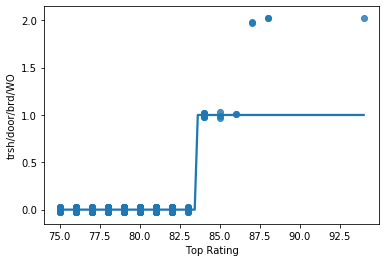

In [25]:
# Plot Top Rating (x) and trsh/door/brd/WO (y)

sns.regplot(x = "Top Rating", y = "trsh/door/brd/WO",
           y_jitter = 0.03,
           data = premium_gold_pack_df,
           logistic = True,
           ci = None)
# Display the plot
plt.show()

In [26]:
premium_gold_pack_df.describe()

Event  trsh/door/brd/WO  Top Rating
count  750.000000        750.000000  750.000000
mean   120.662667          0.040000   79.308000
std     26.203620          0.227601    2.344169
min      1.000000          0.000000   75.000000
25%    112.000000          0.000000   78.000000
50%    130.000000          0.000000   79.000000
75%    133.000000          0.000000   81.000000
max    140.000000          2.000000   94.000000

In [27]:
train_data, test_data = train_test_split(premium_gold_pack_df,
                                         test_size = 0.20,
                                         random_state = 42)

In [28]:
formula = ('trsh/door/brd/WO ~ Top Rating')
model = logit(formula = formula, data = train_data).fit()

SyntaxError: invalid syntax (<unknown>, line 1)

In [29]:
# I Think I need to make Top Rating --> top_rating

In [ ]:
grouped = data.groupby(['Pack Type'])
grouped.head()

In [ ]:
for pack, group in grouped:
    print('Pack Type')
    print(group)
    print()

In [ ]:
print(grouped.groups)

# Verify values + index are the same using eye test

In [ ]:
print(len(grouped.groups))

In [ ]:
# need avg top rating by probability

In [ ]:
grouped.mean()

In [ ]:
print(data['Pack Type'].nunique())

In [ ]:
data['Pack Type'].value_counts()

In [ ]:
grouped.describe()

### Finding True Pack Probabilities

## Packs to investigate:
##### 1: gold pack
##### 2: premium gold pack
##### 3: premium gold players pack
##### 4: jumbo premium gold pack
##### 5: prime gold players pack
##### 6: rare gold pack
##### 7: mega pack
##### 8: rare players pack
##### 9: premium electrum players pack

## 2: Premium Gold Pack

#### Odds:
#### Gold 75+ : 100.00%
#### Gold 82+ : 19.00%
#### Gold 84+ : 4.90%

In [ ]:
premium_gold_pack_75 = data.loc[((data['Pack Type'] == 'premium gold pack') & (data['Top Rating'] >= 75))]
premium_gold_pack_82 = data.loc[((data['Pack Type'] == 'premium gold pack') & (data['Top Rating'] >= 82))]
premium_gold_pack_84 = data.loc[((data['Pack Type'] == 'premium gold pack') & (data['Top Rating'] >= 84))]

In [ ]:
print(f'75+ Count : {len(premium_gold_pack_75)}')
print(f'82+ Count : {len(premium_gold_pack_82)}')
print(f'84+ Count : {len(premium_gold_pack_84)}')

In [ ]:
premium_gold_pack_75_num = len(data[(data['Pack Type'] == 'premium gold pack') & (data['Top Rating'] >= 75)])
premium_gold_pack_82_num = len(data[(data['Pack Type'] == 'premium gold pack') & (data['Top Rating'] >= 82)])
premium_gold_pack_84_num = len(data[(data['Pack Type'] == 'premium gold pack') & (data['Top Rating'] >= 84)])

print(premium_gold_pack_75_num)
print(premium_gold_pack_82_num)
print(premium_gold_pack_84_num)

#data[(data['Pack Type'] == 'premium gold pack') & (data['Top Rating'] >= 82)]

In [ ]:
premium_gold_pack_denom = len(data[(data['Pack Type'] == 'premium gold pack')])
premium_gold_pack_denom

In [ ]:
premium_gold_pack_75_percent = premium_gold_pack_75_num/premium_gold_pack_denom
premium_gold_pack_82_percent = premium_gold_pack_82_num/premium_gold_pack_denom
premium_gold_pack_84_percent = premium_gold_pack_84_num/premium_gold_pack_denom


print(premium_gold_pack_75_percent)
print(premium_gold_pack_82_percent)
print(premium_gold_pack_84_percent)

In [ ]:
sns.boxplot(data[(data['Pack Type'] == 'premium gold pack')]['Top Rating']);

## Hypothesis

### 1) The probabilities of getting good players in FIFA 20 packs are lower than the pack probabilities posted by EA Sports simulation model.

### 2) EA Sports is not telling the truth when it comes to the true probability of getting goods players in packs.

### 3) Could the true probability of getting good players in packs be significant enough to compare this case to DraftKings average DFS contest results? Assuming the true probability is lower than what EA Sports tells us.

## Binomial Test

In [ ]:
# Binomial test compares a sample proportion to a hypothesized proportion.

# binom_test(x,n=None,p=0.5,alternative='two-sided')
# x: # of successes
# n: total number of trials
# p: probability of success on each trial
# alternative: alternative hypothesis. Default is 'two-sided' but can also specify 'greater' or 'less'


# alternative = what I want to test for (aka pack weight is lower than advertised)

### 2) Premium Gold Pack - Binomial Test

#### Fifa Odds:
##### Gold 75+ : 100.00%
##### Gold 82+ : 19.00%
##### Gold 84+ : 4.90%

#### My Odds:
##### Gold 75+ : 100.00%
##### Gold 82+ : 16.53%
##### Gold 84+ : 3.33%

#### My Count: n=750
##### Gold 75+ : 750
##### Gold 82+ : 124
##### Gold 84+ : 25

In [ ]:
# 82+
# h0: get 82+ rating > 21.31% of the time
# ha: get 82+ rating <= 21.31% of the time
# x = 124
# n=750
# p=19%

binom_test(x=124, n=750, p=.19, alternative='less')

In [ ]:
# Because the p value (.371) IS NOT less than .05, we fail to reject the null hypothesis.
# We do not have sufficient evidence to say the 82+ pack rating is biased to =< 19%

In [ ]:
# 84+
# h0: get 84+ rating > 4.9% of the time
# ha: get 84+ rating <= 4.9% of the time
# x = 25
# n=750
# p=4.9%

binom_test(x=25, n=750, p=.049, alternative='less')

In [ ]:
# Because the p value (.158) IS NOT less than .05, we fail to reject the null hypothesis.
# We do not have sufficient evidence to say the 84+ pack rating is biased to =< 4.9%

In [ ]:
prem = data.loc[((data['Pack Type'] == 'premium gold pack') & (data['Top Rating']))]
prem.hist(figsize=(30,20));

In [ ]:
prem.boxplot(figsize=(10,10));

In [ ]:
feature_cols = ['Pack Type','Top Rating']
test = ['trsh/door/brd/WO']

In [ ]:
x = df[feature_cols]
y = df.test

In [ ]:
#https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

In [ ]:
## Next do a classification to predict a board or walkout from 1000 seperate pack openings

In [ ]:
# https://www.statology.org/binomial-test-python/

# Jeff
# If your p-value is greater than 0.05, that means you fail to reject the null hypothesis and conclude that the actual probability is greater than or equal to what FIFA said
# If your p-value is less than 0.05, you reject the null hypothesis and conclude that the actual probability is less than what FIFA said

# Me
# Because the p value is greater than 0.05, we fail to reject the null hypothesis and conclude that the actual pack probability is greater than or equal to Fifa's stated pack probability.
# Because the p value is less than 0.05, we reject the null hypothesis and conclude that the actual pack probability is less than Fifa's stated pack probability.

## Do pack by WO, board